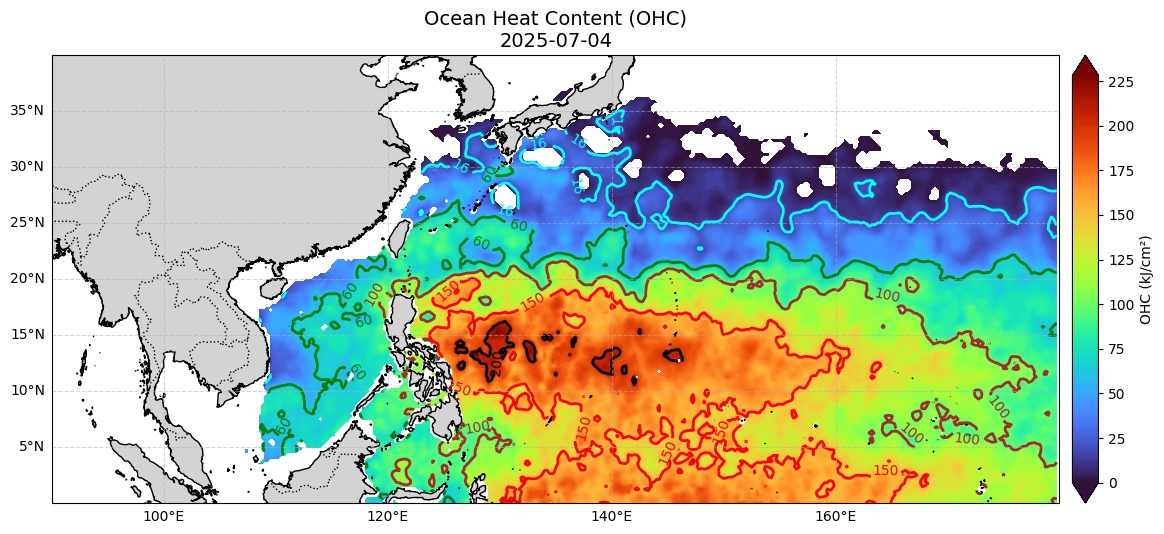

In [69]:
#OHC test

import subprocess, sys, datetime
packages = ["netCDF4", "erddapy", "cartopy", "pydap"]
for package in packages:
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load dataset
url = "https://cwcgom.aoml.noaa.gov/thredds/dodsC/UOHC/UOHC.nc"
ds = xr.open_dataset(url)
ohc = ds["Ocean_Heat_Content"].isel(time=-1)
time_str = str(ohc.time.values).split("T")[0]

# Subset region with valid data
ohc_subset = ohc.sel(lat=slice(0, 40), lon=slice(90, 179.99))

# Create figure and map axis
fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([90, 179.99, 0, 40], crs=ccrs.PlateCarree())

# Plot filled contours
levels = np.arange(0, 229, 1)
cf = ax.contourf(
    ohc_subset.lon,
    ohc_subset.lat,
    ohc_subset,
    levels=levels,
    cmap="turbo",
    vmin=0,
    vmax=229,
    extend="both"
)

# Dynamically align colorbar to map height
pos = ax.get_position()
cbar_ax = fig.add_axes([pos.x1 + 0.01, pos.y0, 0.02, pos.height])
cbar = plt.colorbar(cf, cax=cbar_ax, orientation="vertical", label="OHC (kJ/cm²)")
cbar.set_ticks(np.arange(0, 229, 25))

# Highlight thresholds
for val, color in zip([16, 60, 100, 150, 200], ["cyan", "green", "brown", "red", "black"]):
    cs = ax.contour(ohc_subset.lon, ohc_subset.lat, ohc_subset, levels=[val], colors=[color], linewidths=2)
    ax.clabel(cs, fmt={val: f"{val}"}, inline=True, fontsize=10)

# Add land and gridlines
ax.coastlines(resolution="10m")
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.BORDERS, linestyle=":")
gl = ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)
gl.top_labels = False
gl.right_labels = False

# Title
ax.set_title(f"Ocean Heat Content (OHC)\n{time_str}", fontsize=14)
plt.show()

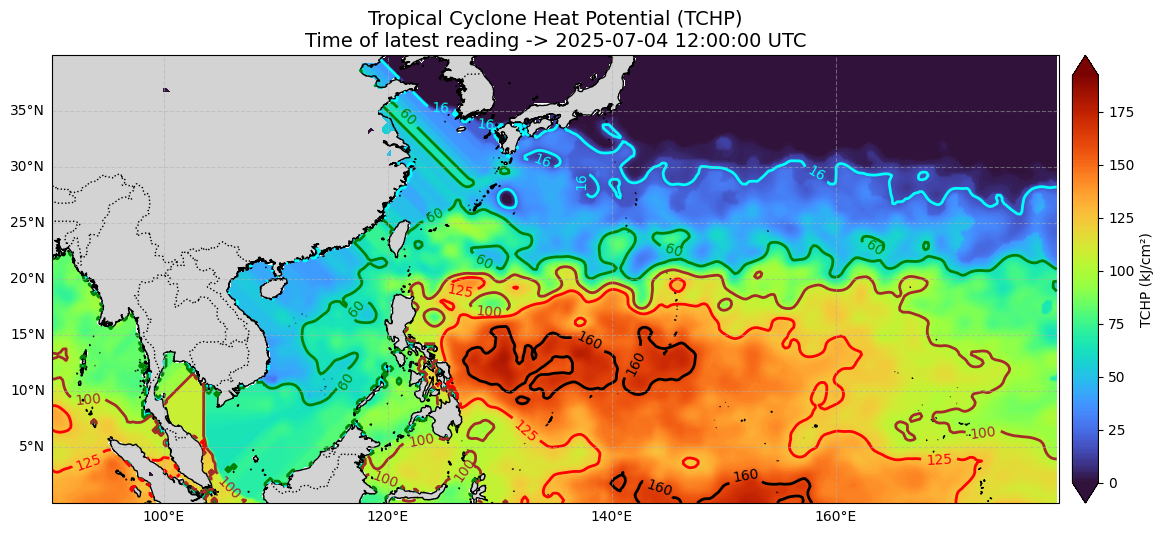

In [77]:
#TCHP test
import subprocess, sys, datetime
packages = ["netCDF4", "erddapy", "cartopy", "pydap"]
for package in packages:
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load dataset
url = "https://cwcgom.aoml.noaa.gov/thredds/dodsC/TCHP/TCHP.nc"
ds = xr.open_dataset(url)
tchp = ds["Tropical_Cyclone_Heat_Potential"].isel(time=-1)
time_str = str(tchp.time.values).split("T")[0]
time_of_day_str = str(tchp.time.values).split("T")[1]

# Subset region with valid data
ohc_subset = tchp.sel(lat=slice(0, 40), lon=slice(90, 179.99))

# Create figure and map axis
fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([90, 179.99, 0, 40], crs=ccrs.PlateCarree())

# Plot filled contours
levels = np.arange(0, 193, 1)
cf = ax.contourf(
    ohc_subset.lon,
    ohc_subset.lat,
    ohc_subset,
    levels=levels,
    cmap="turbo",
    vmin=0,
    vmax=193,
    extend="both"
)

# Dynamically align colorbar to map height
pos = ax.get_position()
cbar_ax = fig.add_axes([pos.x1 + 0.01, pos.y0, 0.02, pos.height])
cbar = plt.colorbar(cf, cax=cbar_ax, orientation="vertical", label="TCHP (kJ/cm²)")
cbar.set_ticks(np.arange(0, 193, 25))

# Highlight thresholds
for val, color in zip([16, 60, 100, 125, 160], ["cyan", "green", "brown", "red", "black"]):
    cs = ax.contour(ohc_subset.lon, ohc_subset.lat, ohc_subset, levels=[val], colors=[color], linewidths=2)
    ax.clabel(cs, fmt={val: f"{val}"}, inline=True, fontsize=10)

# Add land and gridlines
ax.coastlines(resolution="10m")
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.BORDERS, linestyle=":")
gl = ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)
gl.top_labels = False
gl.right_labels = False

# Title
ax.set_title(f"Tropical Cyclone Heat Potential (TCHP)\nTime of latest reading -> {time_str} {time_of_day_str[:8]} UTC", fontsize=14)
plt.show()